## Notebook imports and Packages

In [69]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import Boston_Valuation as Val

%matplotlib inline

Z:\ANACONDA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

## Gather data

In [3]:
boston_dataset=load_boston()
print(type(boston_dataset))
# print(boston_dataset)

<class 'sklearn.utils.Bunch'>


Z:\ANACONDA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

In [4]:
dir(boston_dataset)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Data points and features

In [6]:
boston_dataset.data
boston_dataset.data.shape

(506, 13)

In [7]:
#data points = 506   //rows
#features = 13   //attributes, features, independent variables, independent columns

In [8]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### Creating dataframe from the dataset

In [10]:
data_frame = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

#Adding the price column
data_frame["PRICE"] = boston_dataset.target

In [11]:
data_frame #Viewing entire data
data_frame.head() #Viewing only first few data
data_frame.tail() #Viewing only last few data

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [12]:
data_frame.count() #Shows number of rows //rows, data points, instances

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

### Cleaning data - check for missing values

In [13]:
pd.isnull(data_frame).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [14]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Data visualization - Histograms, Distributions and Bar charts

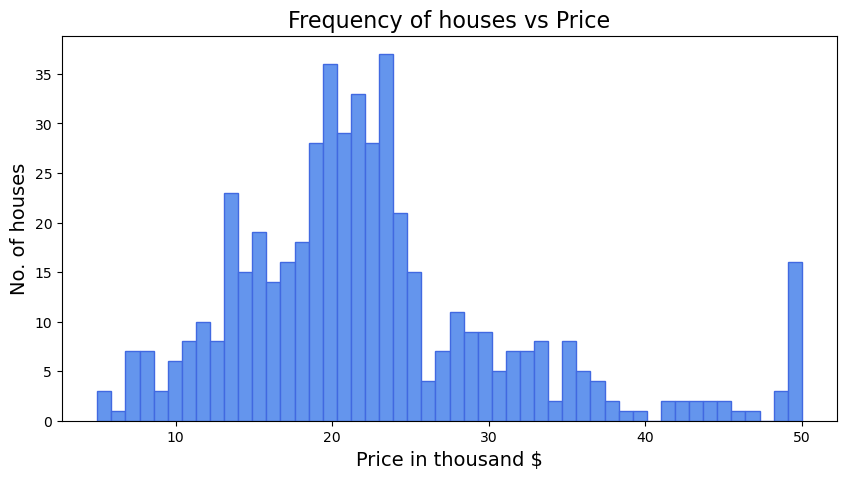

In [15]:
plt.figure(figsize=[10, 5])
plt.title("Frequency of houses vs Price", fontsize=16)
plt.xlabel("Price in thousand $", fontsize=14)
plt.ylabel("No. of houses", fontsize=14)
plt.hist(data_frame["PRICE"], color="cornflowerblue", ec="royalblue", bins=50)
plt.show()

### Seaborn package (matplotlib + some extra features)

Z:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


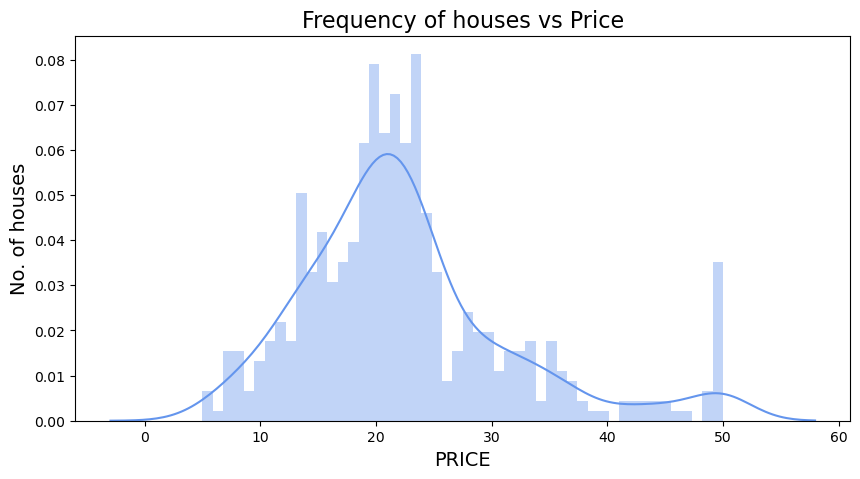

In [16]:
plt.figure(figsize=[10, 5])
plt.title("Frequency of houses vs Price", fontsize=16)
plt.xlabel("Price in thousand $", fontsize=14)
plt.ylabel("No. of houses", fontsize=14)
sns.distplot(data_frame["PRICE"], color="cornflowerblue",bins=50)
plt.show()

Z:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


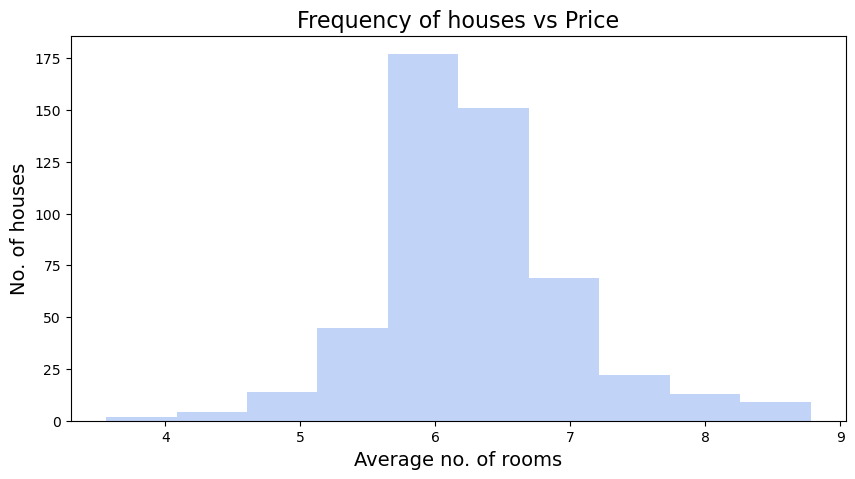

In [17]:
plt.figure(figsize=[10, 5])
plt.title("Frequency of houses vs Price", fontsize=16)
sns.distplot(data_frame["RM"], kde=False, color="cornflowerblue",bins=10)
plt.xlabel("Average no. of rooms", fontsize=14)
plt.ylabel("No. of houses", fontsize=14)
plt.show()

In [18]:
#Average number of roooms in houses
data_frame["RM"].mean()

6.284634387351787

In [19]:
data_frame["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

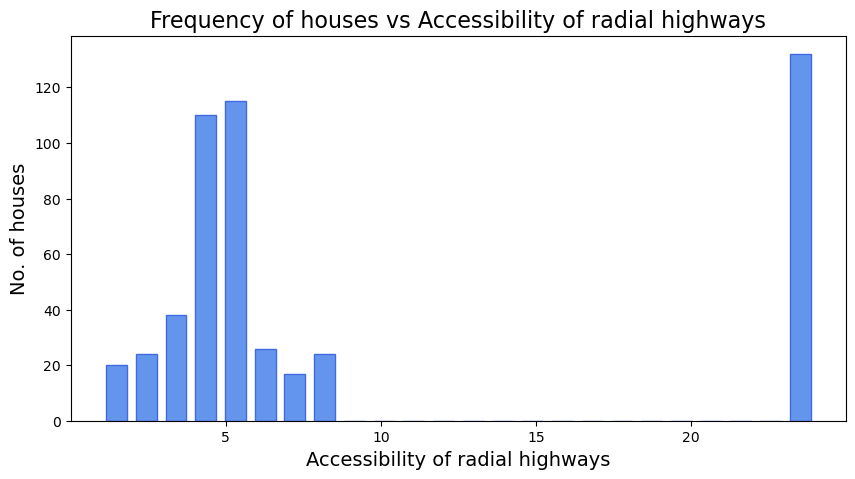

In [20]:
plt.figure(figsize=[10, 5])
plt.title("Frequency of houses vs Accessibility of radial highways", fontsize=16)
plt.xlabel("Accessibility of radial highways", fontsize=14)
plt.ylabel("No. of houses", fontsize=14)
plt.hist(data_frame["RAD"], bins=24, color="cornflowerblue", ec="royalblue", rwidth=0.7)
plt.show()

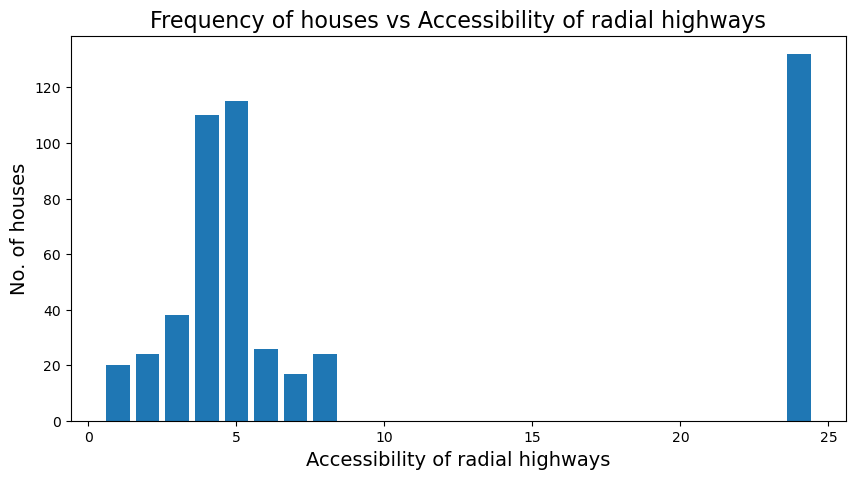

In [21]:
# Bar chart
frequency = data_frame["RAD"].value_counts()
# frequency.index
# frequency.axes[0]

plt.figure(figsize=[10, 5])
plt.title("Frequency of houses vs Accessibility of radial highways", fontsize=16)
plt.xlabel("Accessibility of radial highways", fontsize=14)
plt.ylabel("No. of houses", fontsize=14)
plt.bar(frequency.index, height=frequency)
plt.show()

In [22]:
#binary values - dummy variable
data_frame["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

### Descriptive Statistics

In [23]:
# Mean vs Median
# Median isn't affected by big outliners
# for normal distributions however, mean and median will be same
# so we'll take into consideratin 
# - greatest value
# - smallest value
# - mean value
# - median value

In [24]:
print("Smallest value: ", data_frame["PRICE"].min())
print("Greatest value: ", data_frame["PRICE"].max())
print("Mean value: ", data_frame["PRICE"].mean())
print("Median value: ", data_frame["PRICE"].median())

Smallest value:  5.0
Greatest value:  50.0
Mean value:  22.532806324110698
Median value:  21.2


In [25]:
data_frame.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [26]:
data_frame.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [27]:
data_frame.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [28]:
data_frame.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [29]:
data_frame.describe()  #50% value indicates median

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [30]:
# Correlation between 
# - Features and target
# - Among features themselves

In [31]:
# Strength of correlation
# Direction of correlation

## Correlation
### $\rho_{XY} = coerr(X, Y)$  
### $-1 \le \rho_{XY} \le +1$ 

In [32]:
data_frame["PRICE"].corr(data_frame["RM"])

0.6953599470715393

In [33]:
data_frame["PRICE"].corr(data_frame["PTRATIO"])

-0.5077866855375616

In [34]:
#Multicollinearity - two or more predictors in a regression are highly correlated to each other 
#and cannot provide unique and independent information to the regression.

In [35]:
data_frame.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [36]:
mask = np.zeros_like(data_frame.corr())
triangle_indices = np.triu_indices_from(mask) #indices of the upper triangle as in 'triu'
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

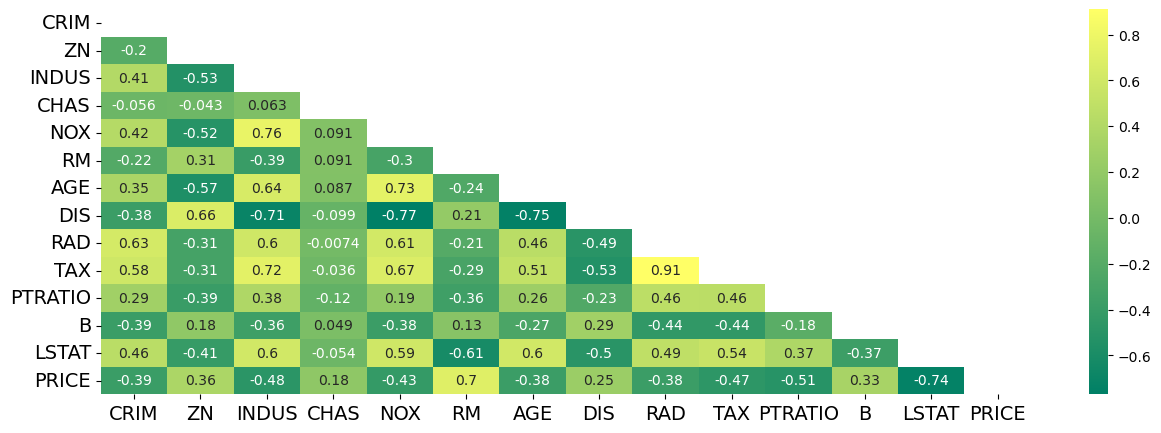

In [37]:
plt.figure(figsize=[15, 5])
# sns.heatmap(data_frame.corr(), cmap='summer')
sns.heatmap(data_frame.corr(), cmap='summer', mask=mask, annot=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

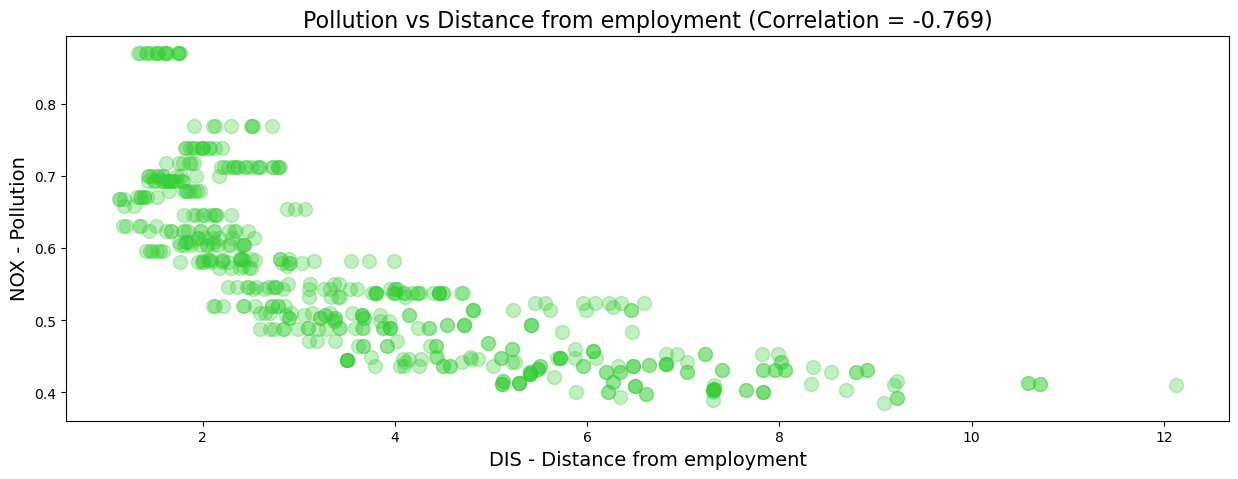

In [38]:
nox_dis_corr = round(data_frame["NOX"].corr(data_frame["DIS"]), 3)

plt.figure(figsize=[15, 5])
plt.title(f"Pollution vs Distance from employment (Correlation = {nox_dis_corr})", fontsize=16)
plt.xlabel("DIS - Distance from employment", fontsize=14)
plt.ylabel("NOX - Pollution", fontsize=14)
plt.scatter(data_frame["DIS"], data_frame["NOX"], color="limegreen", s=100, alpha=0.3)
plt.show()

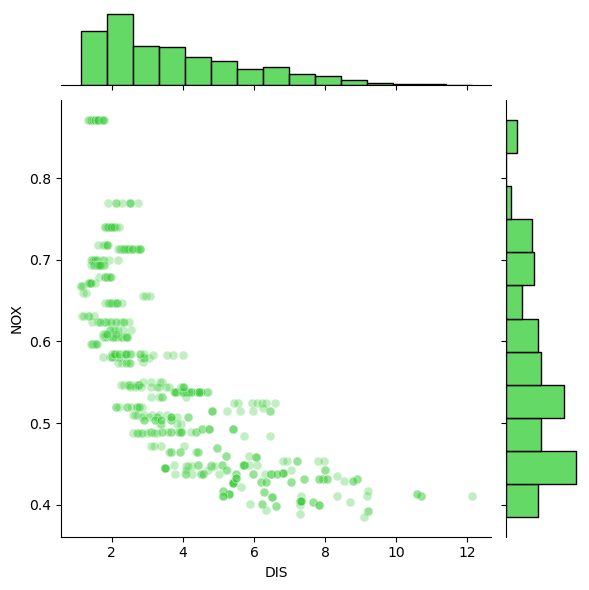

In [39]:

sns.jointplot(x=data_frame["DIS"], y=data_frame["NOX"], color="limegreen", s=40, alpha=0.3)
plt.show()

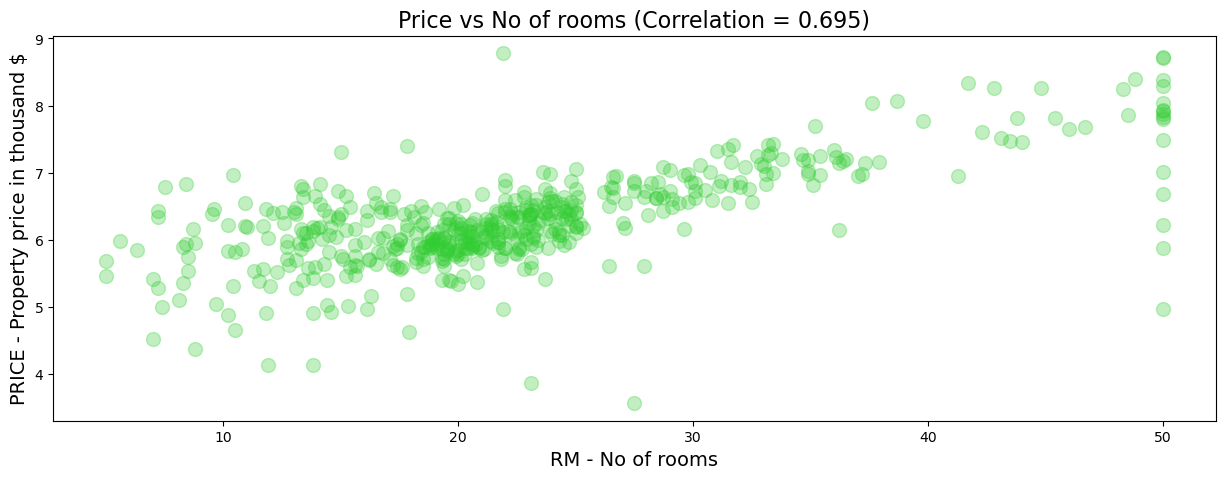

In [40]:
rm_tgt_corr = round(data_frame["RM"].corr(data_frame["PRICE"]), 3)

plt.figure(figsize=[15, 5])
plt.title(f"Price vs No of rooms (Correlation = {rm_tgt_corr})", fontsize=16)
plt.xlabel("RM - No of rooms", fontsize=14)
plt.ylabel("PRICE - Property price in thousand $", fontsize=14)
plt.scatter(data_frame["PRICE"], data_frame["RM"], color="limegreen", s=100, alpha=0.3)
plt.show()

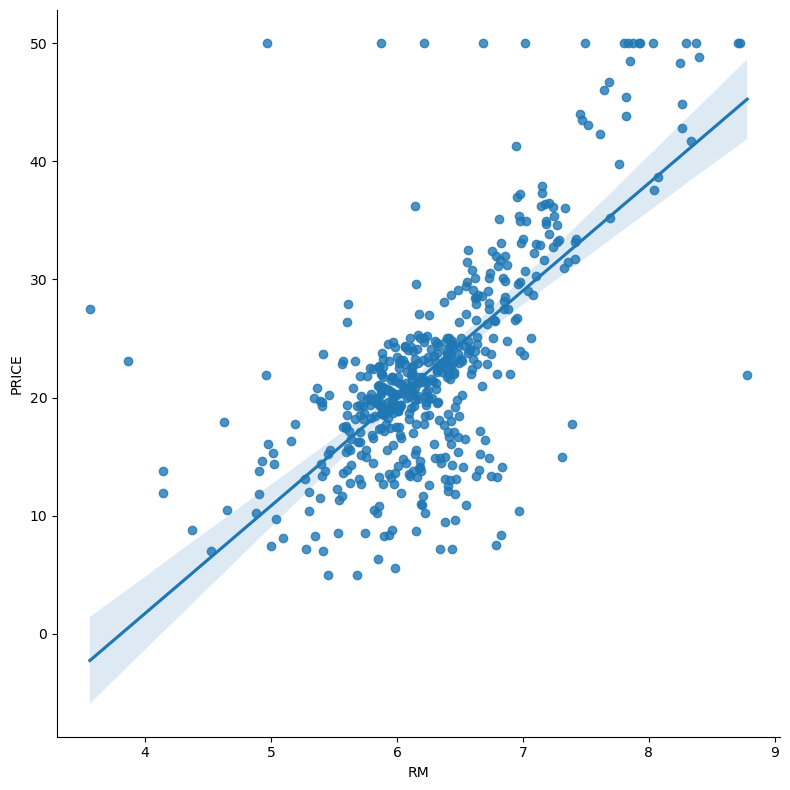

In [41]:
#Scatter plus regression line
sns.lmplot(x="RM", y="PRICE", data=data_frame, height=8)
plt.show()

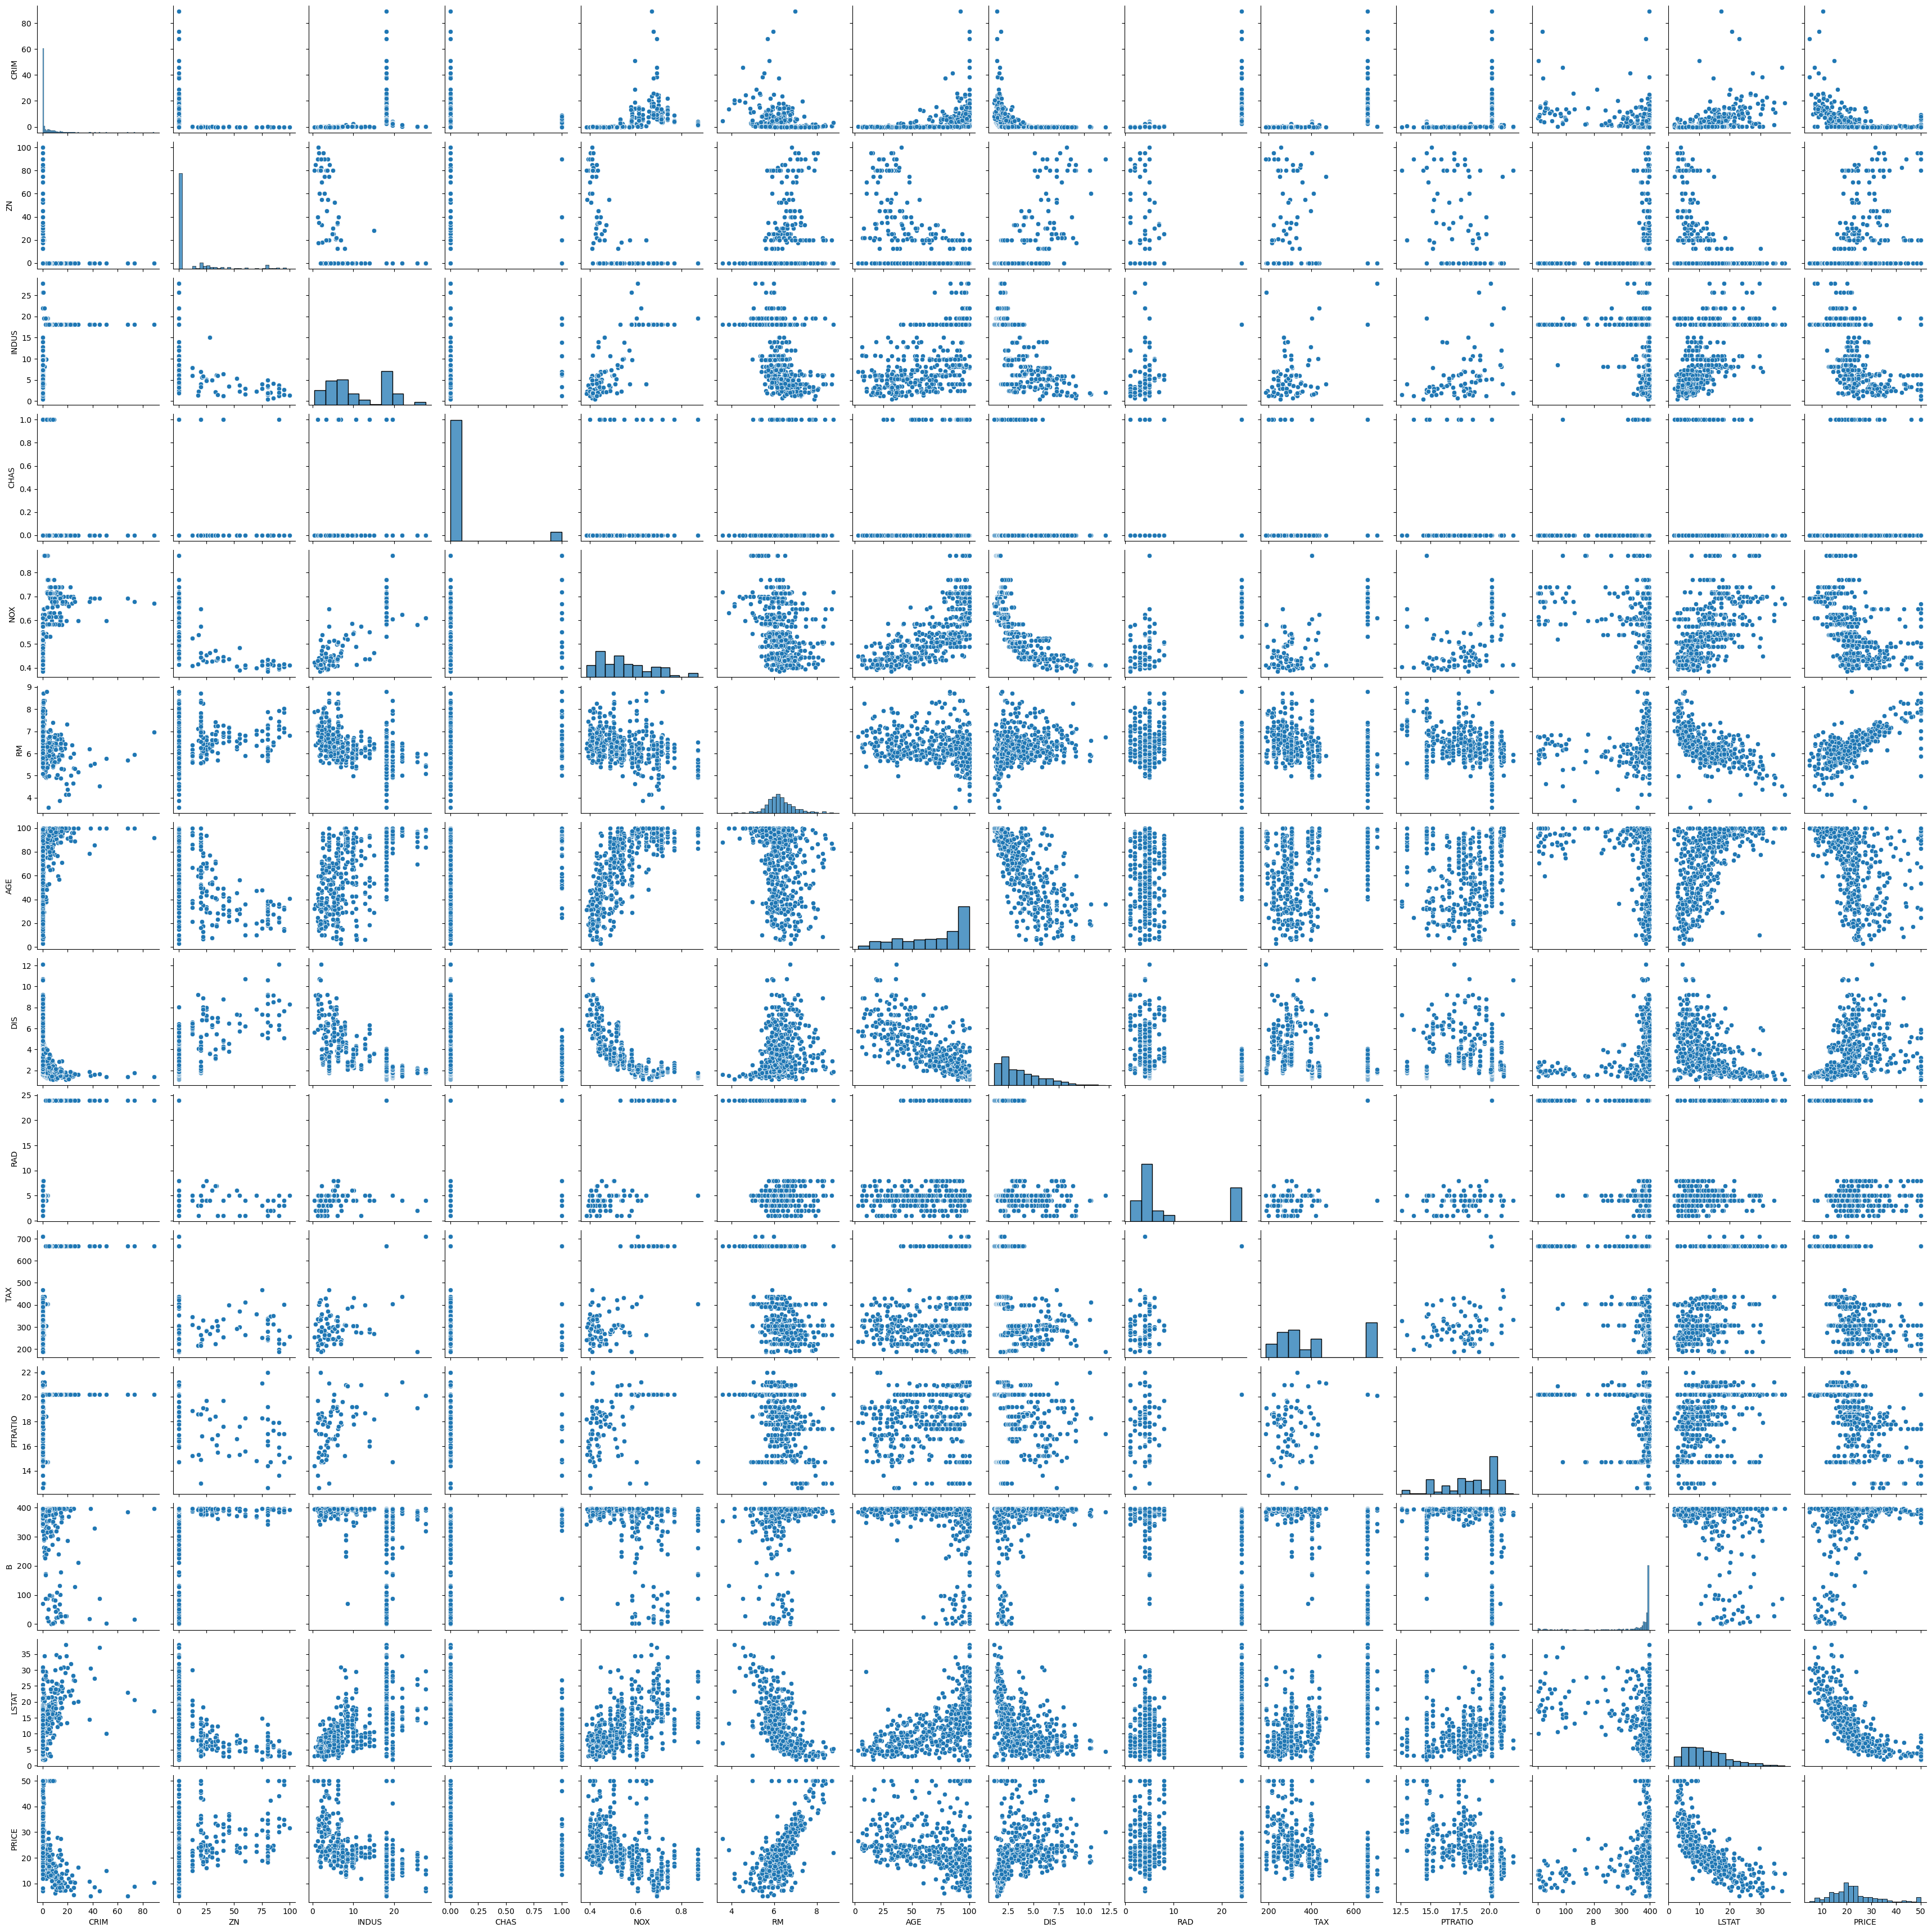

In [42]:
#Scatter plot between every pair of features and target
sns.pairplot(data_frame)
plt.show()

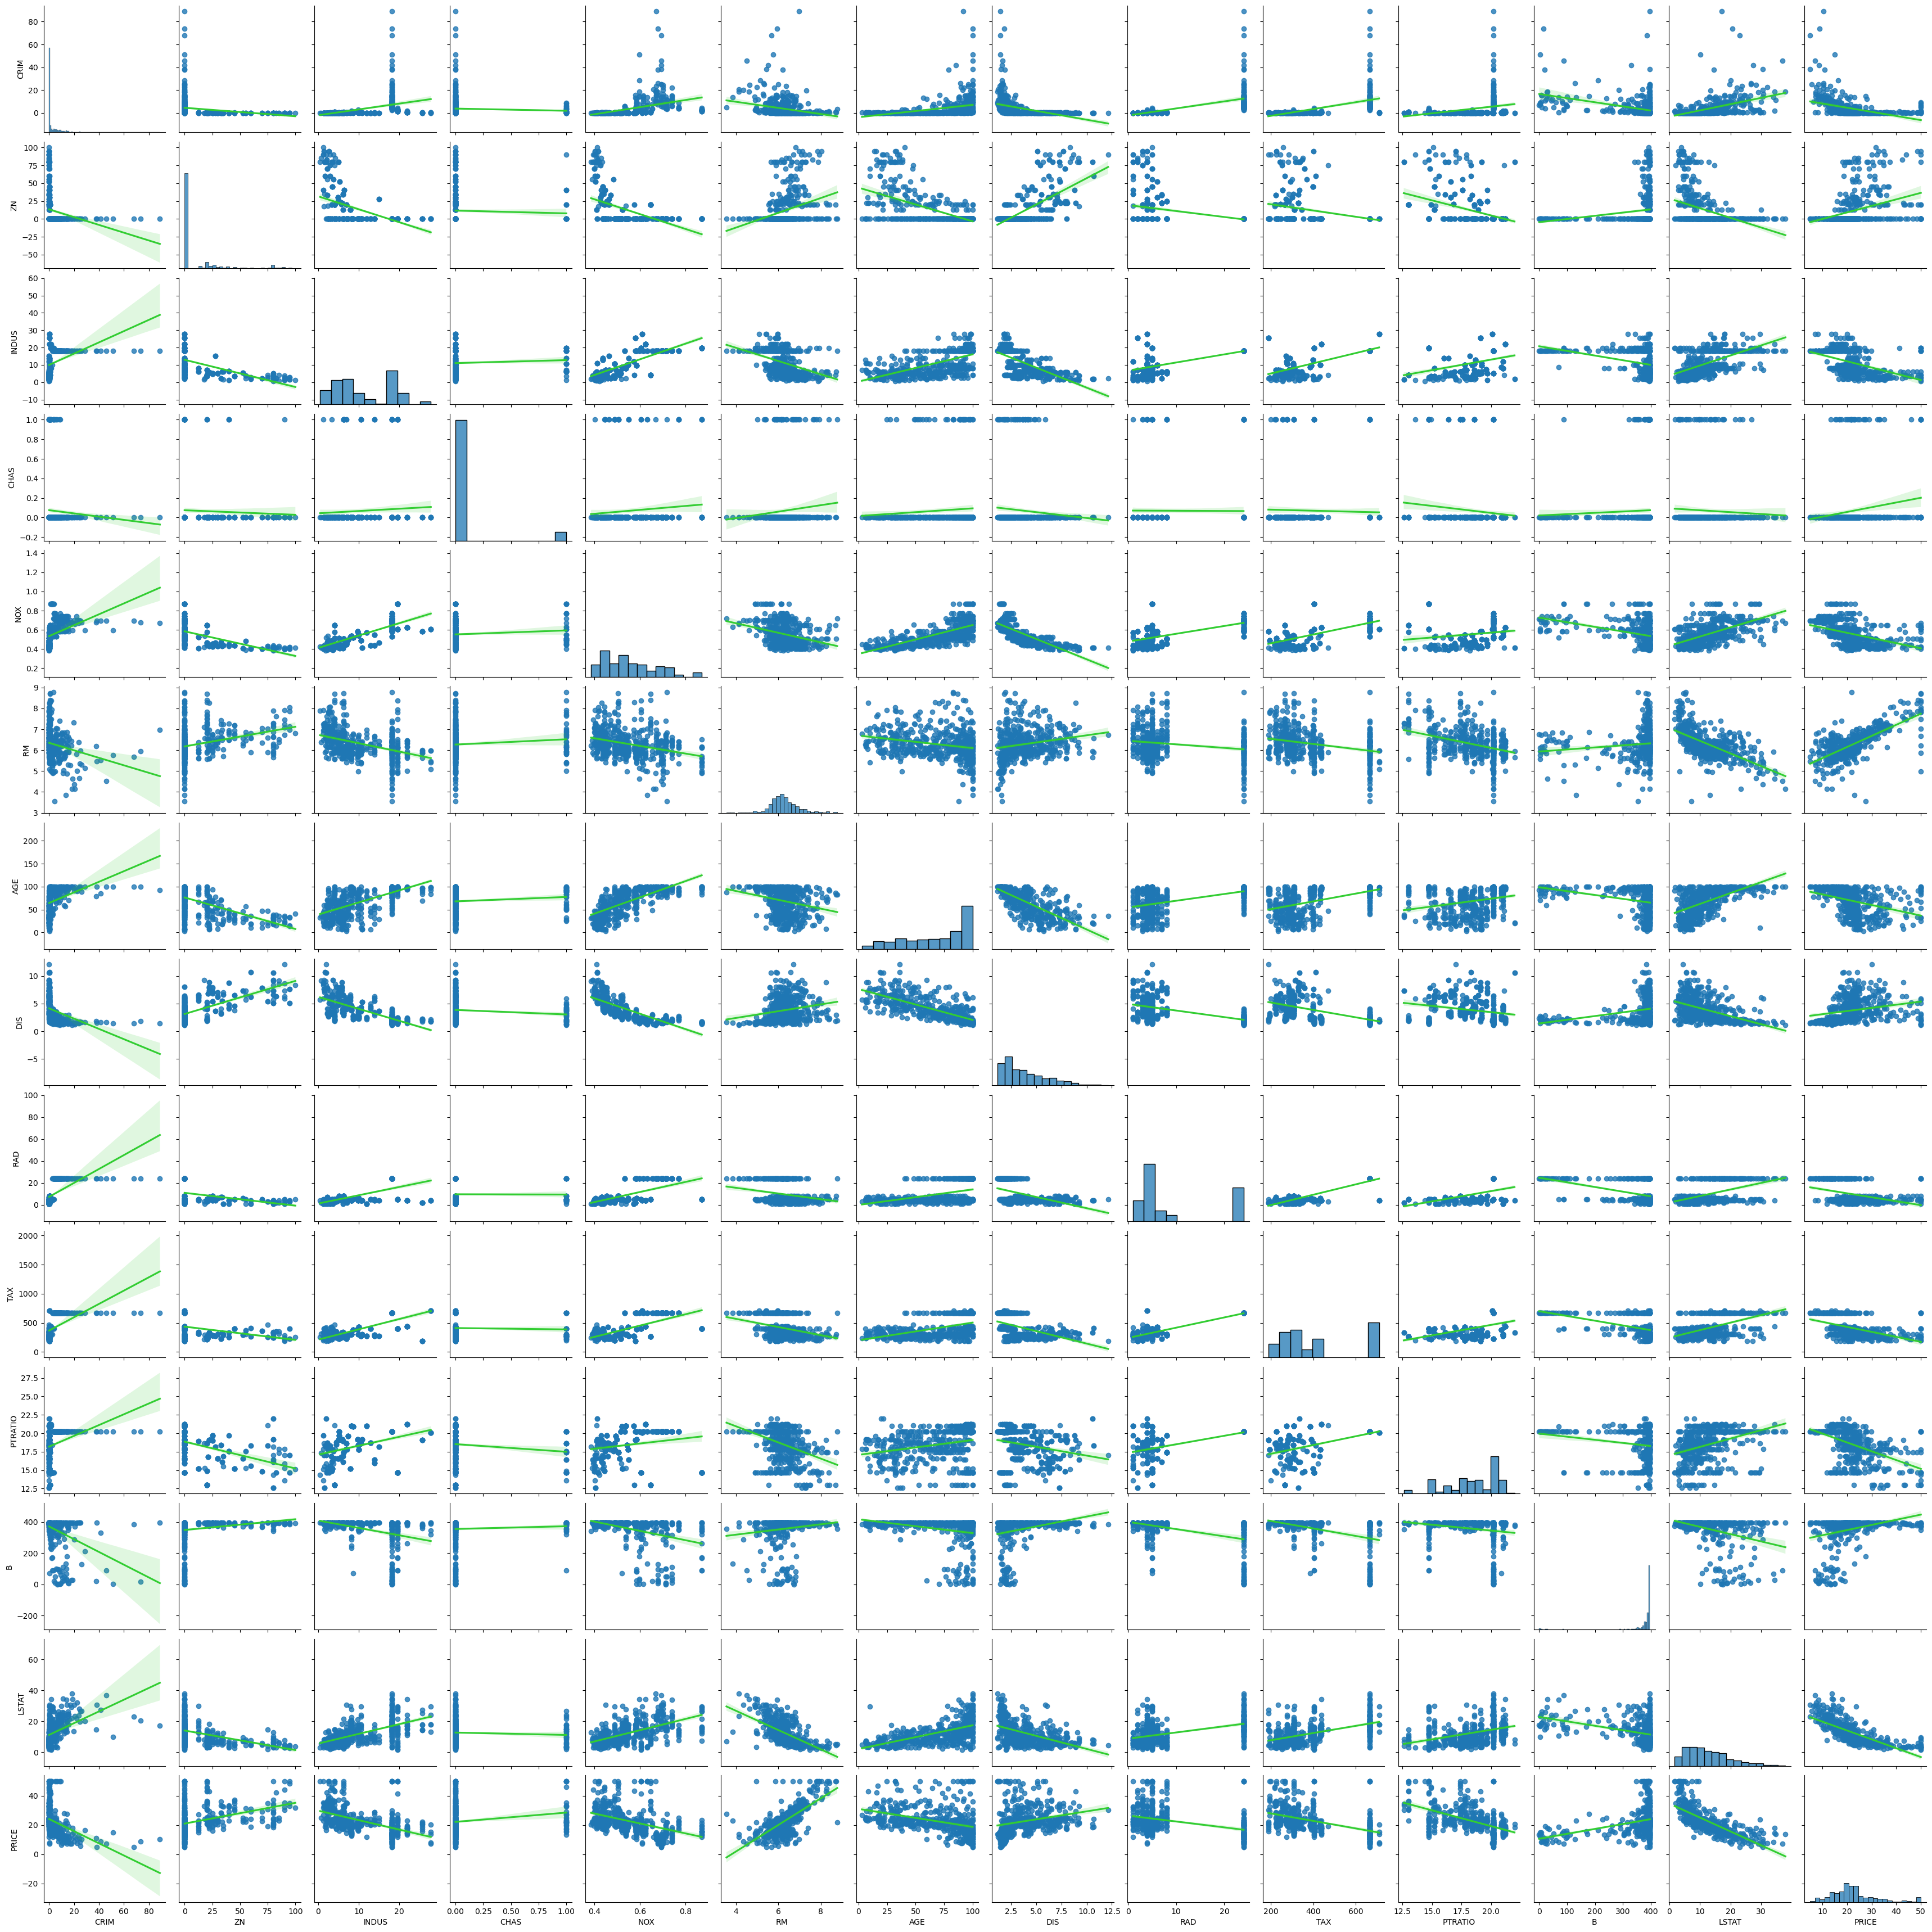

In [43]:
sns.pairplot(data_frame, kind="reg", plot_kws={"line_kws":{"color":"limegreen"}}) #instead of scatter, plot regression lines
plt.show()

## Splitting into train and test datasets

In [44]:
prices = data_frame["PRICE"]  #Series
features = data_frame.drop(columns="PRICE") #Dataframe

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

## Multivariable Regression

In [45]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [46]:
print(regression_model.intercept_)
pd.DataFrame(data=regression_model.coef_, columns=["Coef"])

36.53305138282446


Coef
0   -0.128181
1    0.063198
2   -0.007576
3    1.974515
4  -16.271989
5    3.108456
6    0.016292
7   -1.483014
8    0.303988
9   -0.012082
10  -0.820306
11   0.011419
12  -0.581626

In [47]:
print("Training data r-squared: ", regression_model.score(X_train, y_train))
print("Test data r-squared: ", regression_model.score(X_test, y_test))

Training data r-squared:  0.750121534530608
Test data r-squared:  0.6709339839115638


## Data Transformations

In [48]:
# data_frame.skew()
data_frame["PRICE"].skew()

1.1080984082549072

In [49]:
#log transformation to bring the outliners closer to normalise the distribution
y_log = np.log(data_frame["PRICE"])
y_log.skew()

-0.33032129530987864

Z:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Z:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


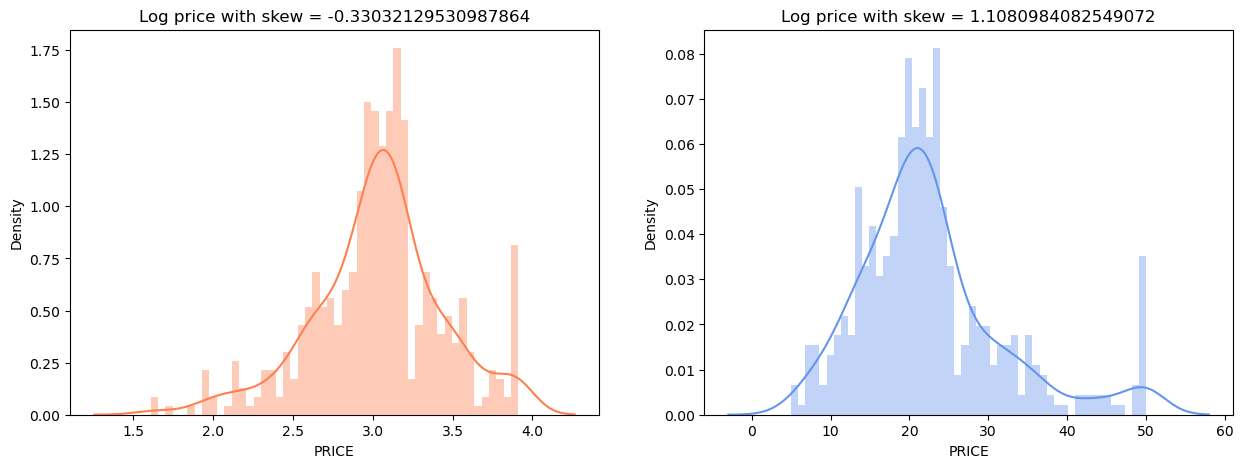

In [50]:
plt.figure(figsize=[15, 5])
plt.subplot(1, 2, 1)
sns.distplot(y_log, color="coral", kde=True, bins=50)
plt.title(f"Log price with skew = {y_log.skew()}")

plt.subplot(1, 2, 2)
sns.distplot(prices, color="cornflowerblue", kde=True, bins=50)
plt.title(f"Log price with skew = {prices.skew()}")
plt.show()

Z:\ANACONDA\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
Z:\ANACONDA\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1500x500 with 0 Axes>

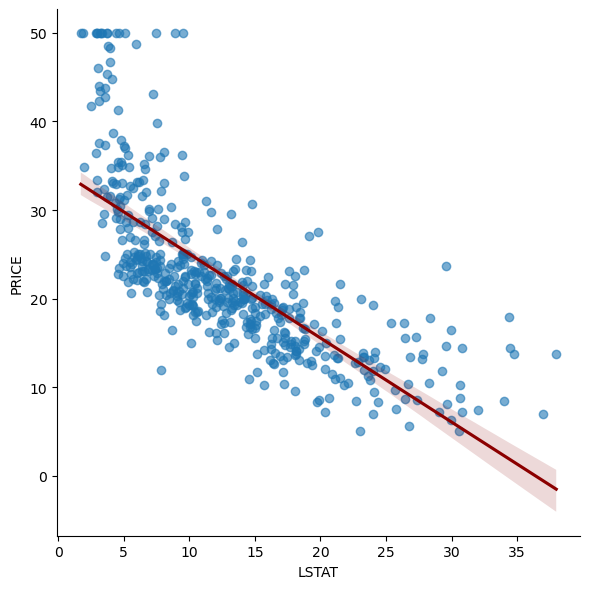

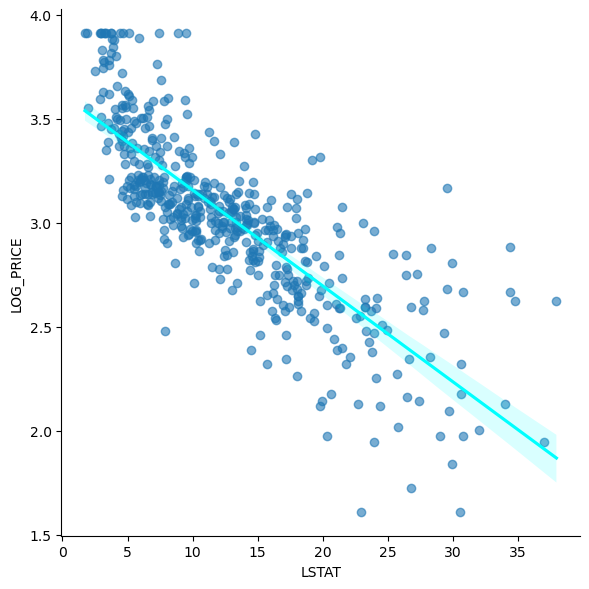

In [51]:
transformed_data = data_frame
transformed_data["LOG_PRICE"] = y_log

plt.figure(figsize=[15, 5])
sns.lmplot(x="LSTAT", y="PRICE", data=transformed_data, size=6, scatter_kws={"alpha":0.6}, line_kws={"color":"darkred"})

sns.lmplot(x="LSTAT", y="LOG_PRICE", data=transformed_data, size=6, scatter_kws={"alpha":0.6}, line_kws={"color":"cyan"})

plt.show()

### Regression using log prices

In [52]:
prices = np.log(data_frame["PRICE"])  #log prices
features = data_frame.drop(columns="PRICE") #Dataframe

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)


In [53]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [54]:
print("Training data r-squared: ", regression_model.score(X_train, y_train))
print("Test data r-squared: ", regression_model.score(X_test, y_test))

Training data r-squared:  1.0
Test data r-squared:  1.0


## p values and Evaluating coefficients

In [55]:
# p-value <= 0.05 --> statistically significant
# p-value > 0.05 ---> statistically insignificant

In [56]:
prices = data_frame["PRICE"]  #Series
features = data_frame.drop(columns="PRICE") #Dataframe

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

In [57]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# results.params
pd.DataFrame({"Coef":results.params, "p-values":round(results.pvalues, 3)})

Coef  p-values
const     -48.313445     0.000
CRIM        0.094842     0.000
ZN          0.030193     0.000
INDUS      -0.049998     0.106
CHAS        0.295732     0.513
NOX        -1.558064     0.430
RM          1.574419     0.000
AGE         0.000340     0.962
DIS        -0.487552     0.000
RAD        -0.000400     0.991
TAX         0.001397     0.455
PTRATIO    -0.093149     0.193
B           0.000638     0.636
LSTAT       0.074377     0.019
LOG_PRICE  20.898441     0.000

In [58]:
#AGE and INDUS are statistically insignificant for our model

## Let's fix multicollinearity and insignificant features

### Testing for Multicollinearity - Variance Inflation Factor (IVF)
$$ TAX = \alpha_0 + \alpha_1 RM + \alpha_2 NOX + ... + \alpha_{12} LSTAT $$  
$$ VIF_{TAX} = \frac{1}{(1 - R_{TAX} ^ 2)} $$  
$ R_{TAX} ^ 2 is \, the \, R-squared for\,TAX$

In [59]:
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i)
      for i in range(len(X_incl_const.columns))]

pd.DataFrame({"Coef": X_incl_const.columns, "vif": np.round(vif, 2)})

Coef      vif
0       const  1087.40
1        CRIM     1.99
2          ZN     2.37
3       INDUS     3.95
4        CHAS     1.09
5         NOX     4.61
6          RM     1.91
7         AGE     3.34
8         DIS     4.53
9         RAD     7.82
10        TAX     8.87
11    PTRATIO     2.00
12          B     1.41
13      LSTAT     4.27
14  LOG_PRICE     4.83

In [60]:
# vif <= 10 or 5 --> ok
# vif > 10 or 5 --> multicollinearity

## Simplifying our regression model by removing features with 
* p-value > 0.05 .....statistically insignificant  
* vif > 10 .................multicollinear  

## Baysian Information Criterion (BIC) measures the complexity of a model  
## we'll compare models using this number and prefer the model with lower BIC

In [61]:
#Original model with log prices and all features
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

orig_coef = pd.DataFrame({"Coef":results.params, "p-values":round(results.pvalues, 3)})
print("BIS = ", results.bic)
print("Score (R-squared) = ", results.rsquared)

BIS =  1847.2738267159898
Score (R-squared) =  0.9410778824532241


In [62]:
#Reduced model excluding INDUS
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(columns="INDUS")

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({"Coef":results.params, "p-values":round(results.pvalues, 3)})
print("BIS = ", results.bic)
print("Score (R-squared) = ", results.rsquared)

BIS =  1843.990648012163
Score (R-squared) =  0.9406800996340693


In [63]:
#Reduced model excluding INDUS and AGE
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(["INDUS", "AGE"], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({"Coef":results.params, "p-values":round(results.pvalues, 3)})
print("BIS = ", results.bic)
print("Score (R-squared) = ", results.rsquared)

BIS =  1837.9909698731087
Score (R-squared) =  0.9406798446256527


In [64]:
frames = [orig_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

Coef  p-values       Coef  p-values       Coef  p-values
const     -48.313445     0.000 -48.072162     0.000 -48.086058     0.000
CRIM        0.094842     0.000   0.095669     0.000   0.095693     0.000
ZN          0.030193     0.000   0.030953     0.000   0.030917     0.000
INDUS      -0.049998     0.106        NaN       NaN        NaN       NaN
CHAS        0.295732     0.513   0.238082     0.598   0.239331     0.595
NOX        -1.558064     0.430  -2.339179     0.223  -2.316697     0.207
RM          1.574419     0.000   1.618079     0.000   1.619624     0.000
AGE         0.000340     0.962   0.000290     0.967        NaN       NaN
DIS        -0.487552     0.000  -0.446011     0.000  -0.447178     0.000
RAD        -0.000400     0.991   0.013691     0.676   0.013567     0.678
TAX         0.001397     0.455   0.000176     0.918   0.000179     0.917
PTRATIO    -0.093149     0.193  -0.110886     0.118  -0.110591     0.116
B           0.000638     0.636   0.000781     0.562   0.000783     0.560
LSTAT       0.074377     0.019   0.070056     0.027   0.070477     0.019
LOG_PRICE  20.898441     0.000  20.861504     0.000  20.863043     0.000

In [65]:
#Any non-random pattern in residual vs predicted value plot 
#indicates something wrong in our model


## Residuals and Residual 

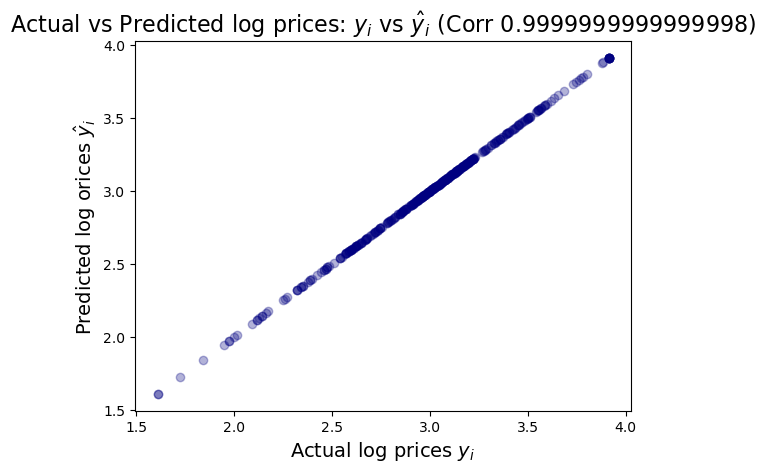

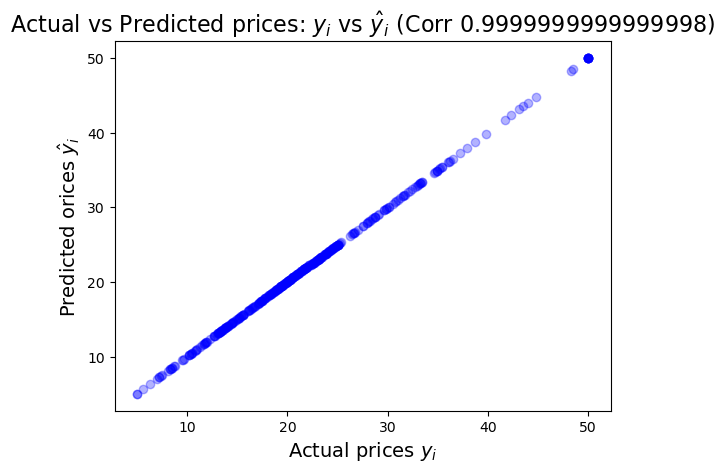

In [66]:
#Modified model: trandformed (using log prices) and simplified (dropping two features)
prices = np.log(data_frame["PRICE"])
features = data_frame.drop(["PRICE", "INDUS", "AGE"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                   test_size=0.2, random_state=10)

#Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#Residuals
# residuals = y_train - results.fittedvalues
# results.resid

#Graph of actual vs predicted prices
corr = y_train.corr(results.fittedvalues)
plt.scatter(x=y_train, y=results.fittedvalues, c="navy", alpha=0.3)
plt.xlabel("Actual log prices $y_i$", fontsize=14)
plt.ylabel("Predicted log orices $\hat y_i$", fontsize=14)
plt.title(f"Actual vs Predicted log prices: $y_i$ vs $\hat y_i$ (Corr {corr})", fontsize=16)
plt.show()

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c="blue", alpha=0.3)
plt.xlabel("Actual prices $y_i$", fontsize=14)
plt.ylabel("Predicted orices $\hat y_i$", fontsize=14)
plt.title(f"Actual vs Predicted prices: $y_i$ vs $\hat y_i$ (Corr {corr})", fontsize=16)
plt.show()

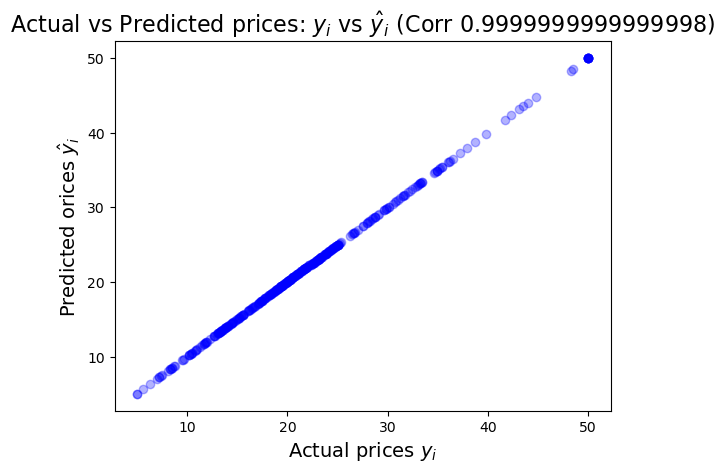

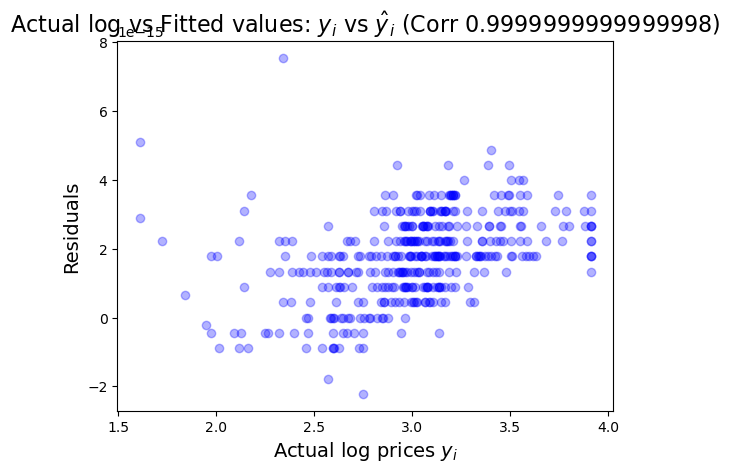

In [67]:
#Modified model: trandformed (using log prices) and simplified (dropping two features)
prices = np.log(data_frame["PRICE"])
features = data_frame.drop(["PRICE", "INDUS", "AGE"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                   test_size=0.2, random_state=10)

#Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#Residuals
# residuals = y_train - results.fittedvalues
# results.resid

#Graph of actual vs predicted prices
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c="blue", alpha=0.3)
plt.xlabel("Actual prices $y_i$", fontsize=14)
plt.ylabel("Predicted orices $\hat y_i$", fontsize=14)
plt.title(f"Actual vs Predicted prices: $y_i$ vs $\hat y_i$ (Corr {corr})", fontsize=16)
plt.show()

#Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c="blue", alpha=0.3)
plt.xlabel("Actual log prices $y_i$", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.title(f"Actual log vs Fitted values: $y_i$ vs $\hat y_i$ (Corr {corr})", fontsize=16)
plt.show()

#Mean Squared Error
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

1.7488760714639843e-15 
 0


Z:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


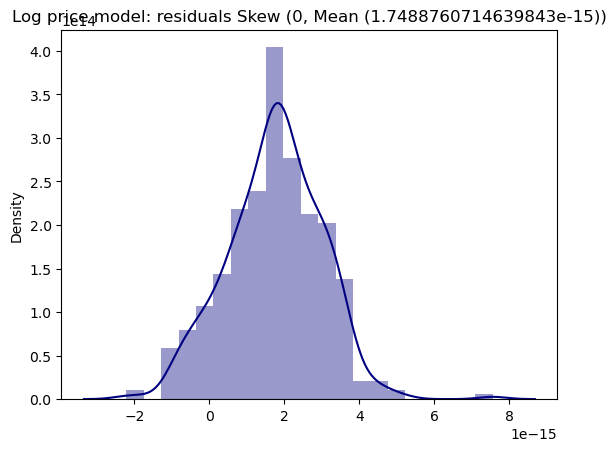

In [68]:
#Distribution of Residuals (log prices) - checking for normality
resid_mean = results.resid.mean()
resid_skew = results.resid.skew()
print(resid_mean,"\n",resid_skew)

sns.distplot(results.resid, color="navy")
plt.title(f"Log price model: residuals Skew ({resid_skew}, Mean ({resid_mean}))")
plt.show()

In [70]:
Val.getEstimate(rm=8,
               ptratio=15,
               chas=True,
               large_range=True)

The estimated property value is 839000.0.
At 95% confidence the valuation range is: 
USD 576000.0 to USD 1220000.0


Z:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
